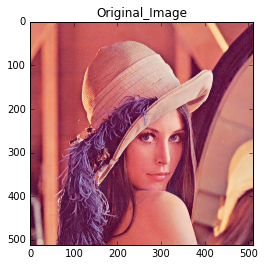

(512, 512) PNG


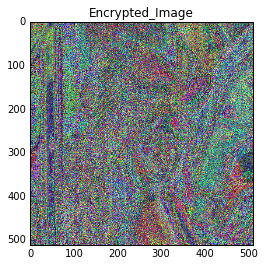

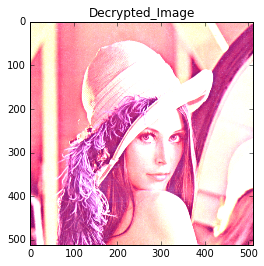

In [2]:
import random, numpy
import os,sys
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import gmpy2
from gmpy2 import mpz
import numpy
# jpgfile = Image.open("lenna.png")
# basewidth = 5
# img = Image.open("lenna.png")  

# wpercent = (basewidth/float(img.size[0]))
# hsize = int((float(img.size[1])*float(wpercent)))
# jpgfile = img.resize((basewidth,hsize), Image.ANTIALIAS)
# print("ff", jpgfile)
jpgfile=Image.open("lena.png") 
#jpgfile.show()
plt.imshow(jpgfile)
plt.title("Original_Image")
plt.show()
print ( jpgfile.size, jpgfile.format)
row,col = jpgfile.size
pixels = np.asarray(jpgfile)


row1 = 1000003
phi = [0 for x1 in range(row1)]
occ = [0 for x1 in range(row1)]
primes = [] 
phi[1] = 1

for i in range(2,1000001):
	#print (i)
	if(phi[i] == 0):
		phi[i] = i-1
		#print (i)
		primes.append(i)
		#j = 2*i
		for j in range (2*i,1000001,i):
			#print("j ",j)
			#print(j)
			if(occ[j] == 0):
				#print ("inside if2")
				occ[j] = 1
				phi[j] = j
				#print (phi[j])
				#print ((i-1)//i)
			phi[j] = (phi[j]*(i-1))//i
			#print(phi[j])
			#j = j + i

# p = primes[random.randrange(1,167)]
# q = primes[random.randrange(1,167)]
# e = primes[random.randrange(1,9000)]
p = primes[10]
q=primes[9]
e=primes[15]

n = p*q
# print (len(primes), len(phi),primes[200], p, q, n)
mod = n
phin1 = phi[n]
phin2 = phi[phin1]

mod1 = phin1

# def power1(x,y,m):
# 	ans=1
# 	while(y>0):
# 		if(y%2==1):
# 			ans=(ans*x)%m
# 		y=y//2
# 		x=(x*x)%m
# 	return ans
def addN(enc1, N):
    enc = np.zeros([row, col, 3]).astype(numpy.float64)
    for i in range(col):
        for j in range(row):
            for k in range(3):
                pix = mpz(int(N))
                pix = gmpy2.powmod(pix, e, mod)
                # print("pix",enc1[j][i][k],N, pix, (enc1[j][i][k] * pix)%mod)
                enc[j][i][k] = (enc1[j][i][k] * pix)%mod
    return enc
def encryption( pixels):
    enc = np.zeros([row, col, 3]).astype(numpy.float64)
    for i in range(col):
        for j in range(row):
            for k in range(3):
                pix = 0.0
                pix = mpz(int(pixels[j][i][k]))
                pix = gmpy2.powmod(pix, e, mod)
                enc[j][i][k] = pix
    return enc

def decryption( enc):
    dec = np.zeros([row, col, 3]).astype(numpy.float64)
    for i in range(row):
        for j in range(col):
            for k in range(3):
                t = enc[i][j][k]
                # t = power1(t, d, mod)
                t = pow(int(t), d, mod)
                t = min(255, t)
                t = max(0,t)
                dec[i][j][k] = t;
    return dec
    
    

d = pow(e,phin2-1,mod1)




#call encyption 

enc = encryption( pixels)

# for i in range(col):
#     for j in range(row):
#         for k in range(3):
#             pix = 0.0
#             pix = pixels[j][i][k]
#             pix = power1(pix+10, e, mod)
#             enc[j][i][k] = pix

img = numpy.array(enc,dtype = numpy.uint8)
img1 = Image.fromarray(img,"RGB")
plt.imshow(img1)
plt.title("Encrypted_Image")
plt.show()
#call decryption 
enc1 = addN(enc, 2)
# print("Encrypted mod,", enc1,"Enc end\n")
dec = decryption( enc1 )
# print(enc)
# print("p=",p,"q=",q,"n=",n,"e=",e,"d=",d,"\n<<",pixels,"\n\n--------------------\n\n",dec,">>")
img2 = numpy.array(dec,dtype = numpy.uint8)
img3 = Image.fromarray(img2,"RGB")

plt.imshow(img3)
plt.title("Decrypted_Image")
plt.show()

# img3.save('out.bmp')
# j = Image.open("out.bmp")
# img = j.save("out.jpg")



In [14]:
def getImageMatrix_gray(imageName):
    im = Image.open(imageName).convert('LA')
    pix = im.load()
    image_size = im.size 
    image_matrix = []
    for width in range(int(image_size[0])):
        row = []
        for height in range(int(image_size[1])):
                row.append((pix[width,height]))
        image_matrix.append(row)
    return image_matrix,image_size[0]

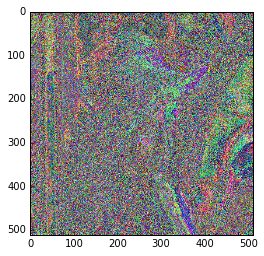

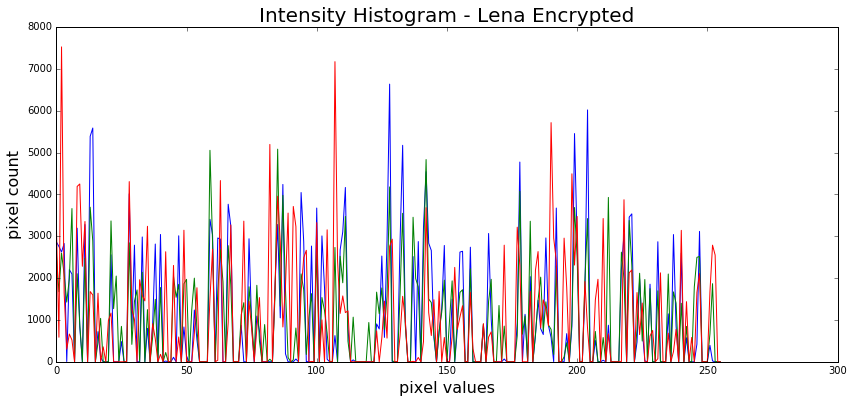

In [16]:
from matplotlib.pyplot import imshow
import cv2 
image = "conco"
ext = ".png"
img = cv2.imread(image + ext,1) 
pil_im = Image.open(image + ext, 'r')
imshow(np.asarray(pil_im))

plt.figure(figsize=(14,6))
histogram_blue = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(histogram_blue, color='blue') 
histogram_green = cv2.calcHist([img],[1],None,[256],[0,256]) 
plt.plot(histogram_green, color='green') 
histogram_red = cv2.calcHist([img],[2],None,[256],[0,256]) 
plt.plot(histogram_red, color='red') 
plt.title('Intensity Histogram - Lena Encrypted', fontsize=20)
plt.xlabel('pixel values', fontsize=16)
plt.ylabel('pixel count', fontsize=16) 
plt.show()

512


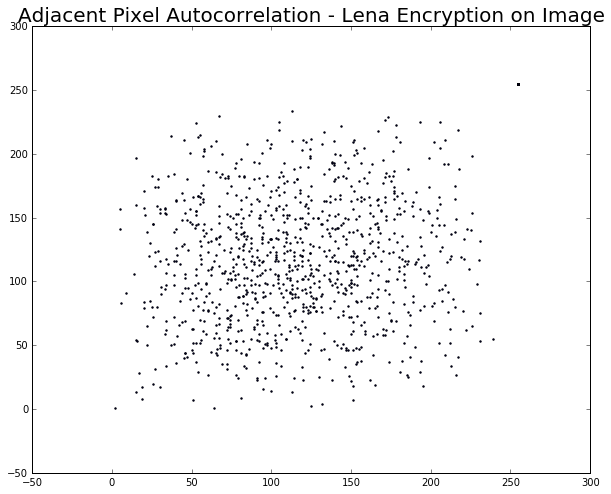

In [17]:
ImageMatrix,image_size = getImageMatrix_gray(image+ext)
samples_x = []
samples_y = []
print(image_size)
for i in range(1024):
  x = random.randint(0,image_size-2)
  y = random.randint(0,image_size-1)
  samples_x.append(ImageMatrix[x][y])
  samples_y.append(ImageMatrix[x+1][y])
plt.figure(figsize=(10,8))
plt.scatter(samples_x,samples_y,s=2)
plt.title('Adjacent Pixel Autocorrelation - Lena Encryption on Image', fontsize=20)
plt.show()